# Autres fonctionnalités

## Traitement retardé avec @dask.delayed

Permet de rajouter des tâches lazy à la queue de calcul. Les fonctions annontées avec `@dask.delayed` sont exécutées suite à un `compute()`.

In [1]:
import dask

@dask.delayed
def inc(x):
   return x + 1

@dask.delayed
def add(x, y):
   return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

c.compute()  # This triggers all of the above computations

5

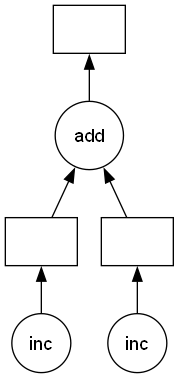

In [2]:
c.visualize()

## Traitement immédiat avec les futures

Démarrage du client et préparation des fonctions.

In [1]:
from dask.distributed import Client

client = Client()

def inc(x):
   return x + 1

def add(x, y):
   return x + y

In [2]:
client.dashboard_link

'http://127.0.0.1:8787/status'

Envoi des tâches au client.

In [7]:
a = client.submit(inc, 1)     # work starts immediately
b = client.submit(inc, 2)     # work starts immediately
c = client.submit(add, a, b)  # work starts immediately

c.result()                # block until work finishes, then gather result

5

Incrémente les entiers de 0 à 99 en parallèle.

In [2]:
def f(x):
    return x + 1

# Run your code in parallel
futures = client.map(f, range(100))
results = client.gather(futures)
results

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [3]:
client.close()